<a href="https://colab.research.google.com/github/timur199429/Image-Classification-tensorflow-cat-dog/blob/main/imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow opencv-python matplotlib > /dev/null

In [ ]:
import tensorflow as tf

In [ ]:
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# add data

In [ ]:
!gdown 1C5HtTU0vfR5j5b9rReGFjeYt_i6jG2cK

Downloading...
From: https://drive.google.com/uc?id=1C5HtTU0vfR5j5b9rReGFjeYt_i6jG2cK
To: /content/data-cat-dog.zip
100% 97.2M/97.2M [00:00<00:00, 145MB/s]


In [ ]:
!unzip /content/data-cat-dog.zip > /dev/null

# 2. Remove images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = 'data'

In [ ]:
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
os.listdir(os.path.join(data_dir, 'cats'))

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/dogs/skynews-dogs-research-study_5498490.jpg
Image not in ext list data/dogs/vector3.svg
Image not in ext list data/dogs/vector10.svg
Image not in ext list data/dogs/vector.svg
Image not in ext list data/dogs/vector7.svg
Image not in ext list data/dogs/German-Shepherd-dog-Alsatian.jpg
Image not in ext list data/dogs/vector11.svg
Image not in ext list data/dogs/8c3b782d1ea3f59990ab7f887bc4dd9112-movie-dogs.jpg
Image not in ext list data/dogs/vector6.svg
Image not in ext list data/dogs/vector9.svg
Image not in ext list data/dogs/teddybear-dog-breeds.jpg
Image not in ext list data/dogs/vector2.svg
Image not in ext list data/dogs/vector5.svg
Image not in ext list data/dogs/800px-French_Bulldog_with_puppies.jpg
Image not in ext list data/dogs/vector8.svg
Image not in ext list data/dogs/vector4.svg
Image not in ext list data/cats/vector3.svg
Image not in ext list data/cats/cat.jpg
Image not in ext list data/cats/vector10.svg
Image not in ext list data/cats/vector.s

# 3 Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
plt.style.use('dark_background')

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 422 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
# get another batch from the iterator
batch = data_iterator.next()

In [ ]:
# images as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# Class 1 = dogs
# Class 0 = cats
batch[1]

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int32)

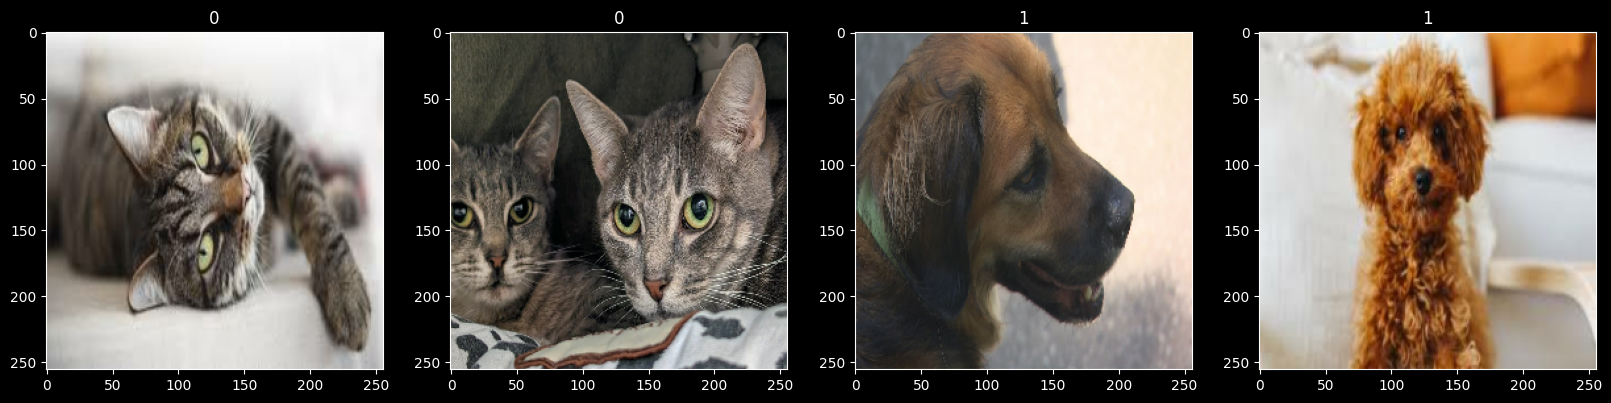

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

4.1 how is it work

In [ ]:
batch[0].max()

255.0

In [ ]:
scaled = batch[0] / 255

In [ ]:
scaled.max()

1.0

4.2 Scale

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.99607843, 1.        , 0.9843137 ],
          [0.99607843, 1.        , 0.9843137 ],
          [0.99607843, 1.        , 0.9843137 ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.99641544, 1.        , 0.9843137 ],
          [0.99641544, 1.        , 0.9843137 ],
          [0.99641544, 1.        , 0.9843137 ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.9979473 , 1.        , 0.9843137 ],
          [0.9979473 , 1.        , 0.9843137 ],
          [0.9979473 , 1.        , 0.9843137 ]],
 
         ...,
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607

# 5. Split data

In [ ]:
len(data)

14

In [ ]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)+1

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(train)

9

In [ ]:
len(val)

3

In [ ]:
len(test)

2

# 6. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7 Train

In [ ]:
!mkdir logs

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 20s 537ms/step - loss: 0.8981 - accuracy: 0.4653 - val_loss: 0.7053 - val_accuracy: 0.4583
Epoch 2/20
9/9 [==============================] - 9s 851ms/step - loss: 0.6810 - accuracy: 0.5660 - val_loss: 0.6799 - val_accuracy: 0.5417
Epoch 3/20
9/9 [==============================] - 7s 637ms/step - loss: 0.6610 - accuracy: 0.6389 - val_loss: 0.6183 - val_accuracy: 0.6979
Epoch 4/20
9/9 [==============================] - 9s 698ms/step - loss: 0.6077 - accuracy: 0.6632 - val_loss: 0.5641 - val_accuracy: 0.6979
Epoch 5/20
9/9 [==============================] - 9s 824ms/step - loss: 0.5377 - accuracy: 0.7465 - val_loss: 0.5155 - val_accuracy: 0.7188
Epoch 6/20
9/9 [==============================] - 9s 836ms/step - loss: 0.4839 - accuracy: 0.7812 - val_loss: 0.3811 - val_accuracy: 0.8125
Epoch 7/20
9/9 [==============================] - 8s 651ms/step - loss: 0.4505 - accuracy: 0.7535 - val_loss: 0.4025 - val_accuracy: 0.8021
Epoch 8/20
9/9 [===

# 8. Plot performance

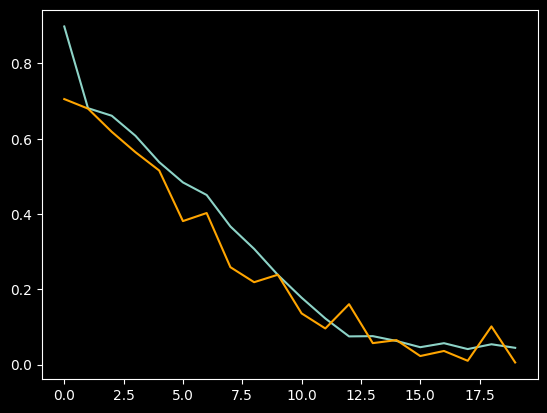

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
plt.show()

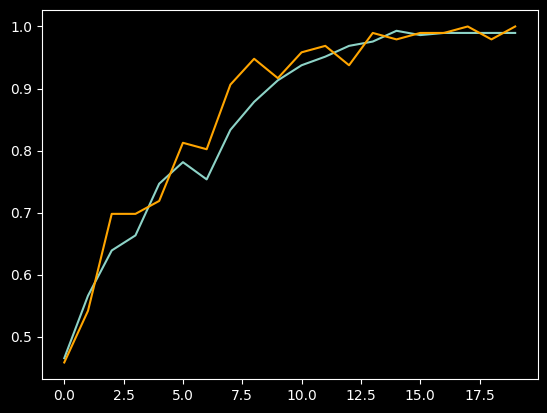

In [ ]:
plt.plot(hist.history['accuracy'],label='acc')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_acc')
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 221ms/step


In [ ]:
print(precision.result(), recall.result(), accuracy.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. TEST

In [ ]:
!gdown 1BV6z9z5NlK8IBUoDFsS-dL4MBVlpsydj

Downloading...
From: https://drive.google.com/uc?id=1BV6z9z5NlK8IBUoDFsS-dL4MBVlpsydj
To: /content/test-cat-dog.zip
100% 255k/255k [00:00<00:00, 128MB/s]


In [ ]:
!unzip /content/test-cat-dog.zip

Archive:  /content/test-cat-dog.zip
  inflating: mult-cat.jpg            
  inflating: mult-dog.jpg            


## 1

In [ ]:
img = cv2.imread('/content/mult-cat.jpg')

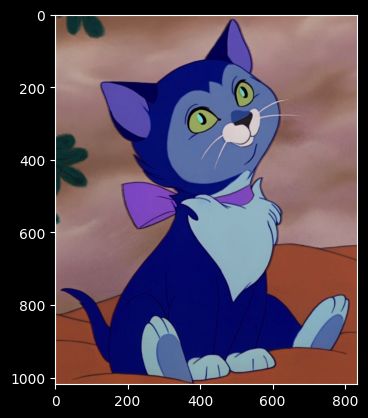

In [ ]:
plt.imshow(img)
plt.show()

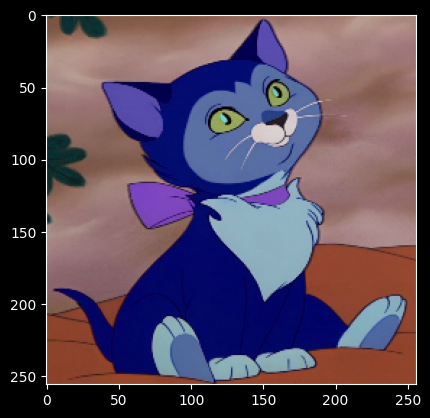

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 23ms/step


In [ ]:
yhat

array([[0.00632073]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'dog')
else:
    print(f'cat')

cat


# 11. Save model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
!mkdir models

In [ ]:
model.save(os.path.join('models','imageclassifier.keras'))

In [ ]:
new_model = load_model('/content/models/imageclassifier.keras')

In [ ]:
img = cv2.imread('/content/mult-dog.jpg')

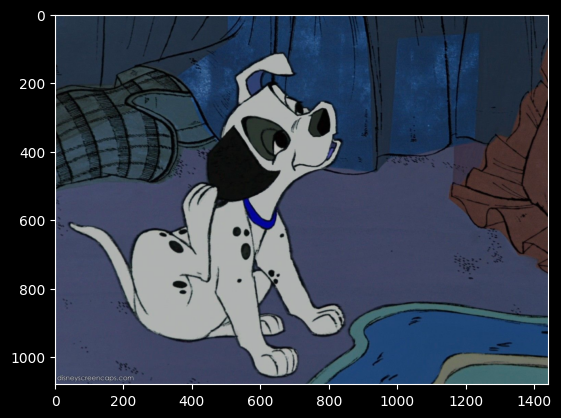

In [ ]:
plt.imshow(img)

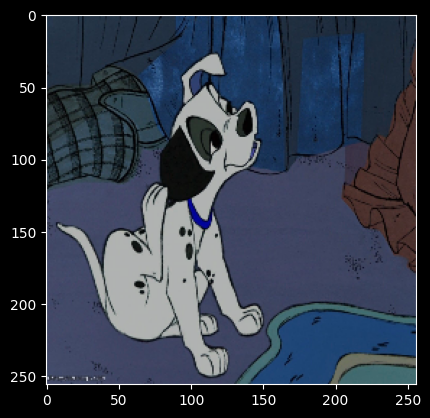

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat1 = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 28ms/step


In [ ]:
yhat1

array([[0.9787214]], dtype=float32)

In [ ]:
if yhat1 > 0.5:
  print('dog')
else:
  print('cat')

dog
